In [1]:
#!pip install tensorflow -q

In [2]:
from tensorflow import keras
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [3]:
# get MNIST handwritten digits image training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize data (each pixel starts as int 0-255; we want it to be a float between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Figure size 640x480 with 0 Axes>

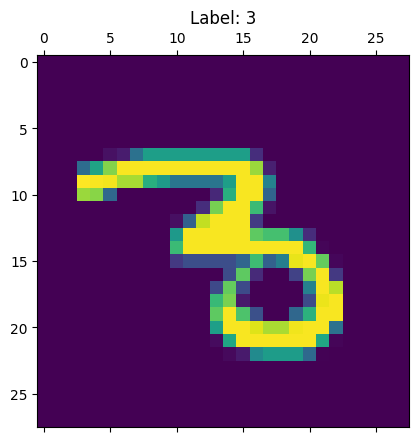

<Figure size 640x480 with 0 Axes>

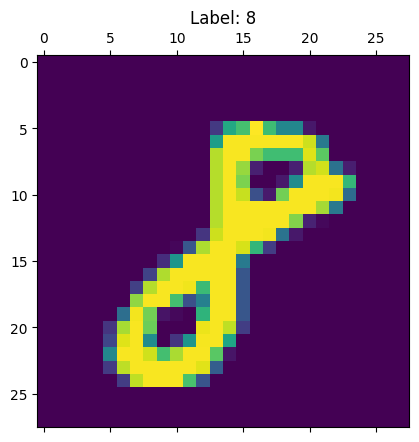

<Figure size 640x480 with 0 Axes>

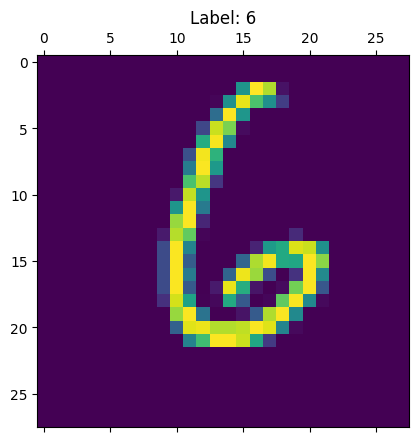

<Figure size 640x480 with 0 Axes>

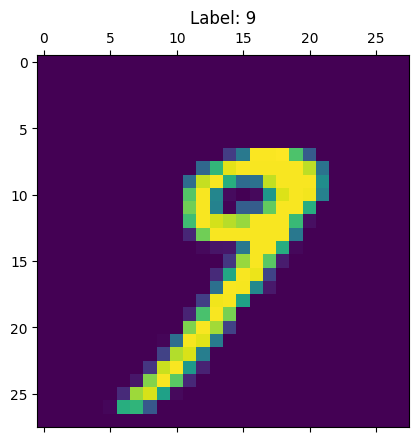

<Figure size 640x480 with 0 Axes>

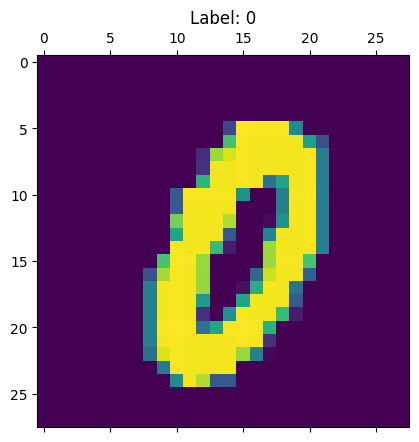

In [5]:
# show sample images

for i in range(30,35):
    plt.figure()
    plt.matshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')


In [6]:
# let's train a perceptron on these images

# first, we need to flatten our images (from 2d into a 1d array)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# create and train the perceptron
perceptron = Perceptron()
perceptron.fit(x_train_flat, y_train)

# print train and test accuracy scores
print(f"Training data score: {perceptron.score(x_train_flat, y_train)}")
print(f"Training data score: {perceptron.score(x_test_flat, y_test)}")


Training data score: 0.8853833333333333
Training data score: 0.8805


In [14]:
print(x_train_flat.shape)
print(x_train.shape)


(60000, 784)
(60000, 28, 28)


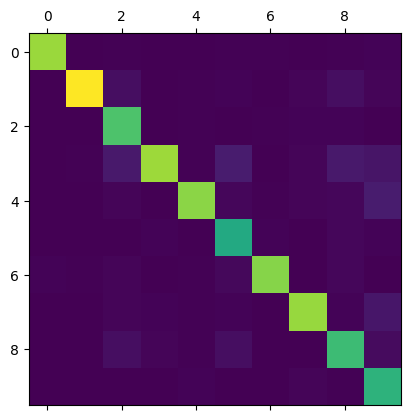

In [7]:
# let's see the confusion matrix
plt.matshow( confusion_matrix( perceptron.predict(x_test_flat), y_test ) )

In [8]:
# let's use tensorflow keras library to build a 10 perceptron model
#  Dense layers are standard fully-interconnected neural network layers
model = keras.models.Sequential([
    keras.layers.Dense(10, activation='softmax') # output layer
])

# we'll use sparse_categorical_crossentropy as the loss function
LOSS_FN = keras.losses.sparse_categorical_crossentropy

# compile the model with standard backprop training algorithm called 'adam'
model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

# train on training data, and validate on test data
# we'll train for 5 epochs
model.fit(x_train_flat, y_train, epochs=5, validation_data=(x_test_flat, y_test))



Epoch 1/5


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4695 - accuracy: 0.8773 - val_loss: 0.3110 - val_accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.3034 - accuracy: 0.9157 - val_loss: 0.2837 - val_accuracy: 0.9209
Epoch 3/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2744 - val_accuracy: 0.9240
Epoch 4/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.2728 - accuracy: 0.9237 - val_loss: 0.2699 - val_accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.2664 - accuracy: 0.9261 - val_loss: 0.2676 - val_accuracy: 0.9263


313/313 [==============================] - 0s 707us/step


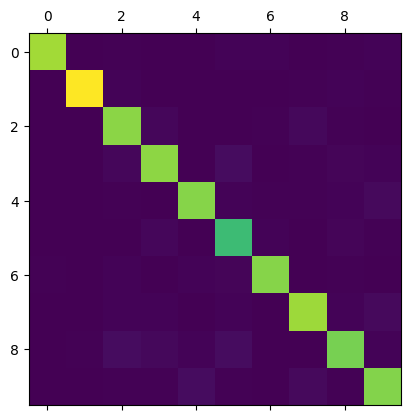

In [9]:
# let's check the confusion matrix
plt.matshow( confusion_matrix( model.predict(x_test_flat).argmax(1), y_test ) )

In [10]:
# let's build a whole bunch of models to compare
modelNames = [
    '1d',
    '2d',
    '3d',
    '1c1d',
    '1c2d',
    '2c2d',
]

# in all models we'll have the same number of nodes per hidden layer
NODES_PER_HIDDEN_LAYER = 64

models = [
    # just the output layer
    keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(10, activation='softmax') # output layer
    ]),
    # 1 hidden layer
    keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),  # hidden layer 1
        keras.layers.Dense(10, activation='softmax') # output layer
    ]),
    # 2 hidden layers
    keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),  # hidden layer 1
        keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),   # hidden layer 2
        keras.layers.Dense(10, activation='softmax') # output layer
    ]),
    # 1 convolutional layer
    keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation="relu"),  #convolutional layer 1
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")  # output layer
    ]),
    # 1 convolutional layer and 1 hidden dense layer
    keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation="relu"),  #convolutional layer 1
        keras.layers.Flatten(),
        keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),  # hidden layer 1
        keras.layers.Dense(10, activation="softmax")  # output layer
    ]),
    # 2 convolutional layers and 1 hidden dense layer
    keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation="relu"),  #convolutional layer 1
        keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation="relu"),  #convolutional layer 2
        keras.layers.Flatten(),
        keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),  # hidden layer 1
        keras.layers.Dense(10, activation="softmax")  # output layer
    ])
]



In [11]:
# compile all models
for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [15]:
x_train.shape

(60000, 28, 28)

In [12]:
TRAINING_EPOCHS = 5

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(x_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.4672 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 2s 816us/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 790us/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.2732 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2666 - accuracy: 0.9254
training model 2d
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.9115
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1530 - accuracy: 0.9548
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0886 - accuracy: 0.9739
Epoch 5/5
1875/1875 [========================

KeyboardInterrupt: 

In [ ]:
# get all model accuracy scores on test data
scores = [model.evaluate(x_test,y_test)[1] for model in models]


313/313 [==============================] - 2s 5ms/step - loss: 0.0535 - accuracy: 0.9864


In [ ]:
# let's also add the perceptron score to our accuracy scores list
modelNames.insert(0, 'perceptron')
scores.insert(0, perceptron.score(x_test_flat, y_test) )

# print all models and scores
for name,score in zip(modelNames,scores):
    print(name, score)

perceptron 0.8805
1d 0.9253000020980835
2d 0.9735000133514404
3d 0.9696999788284302
1c1d 0.982200026512146
1c2d 0.9828000068664551
2c2d 0.9864000082015991


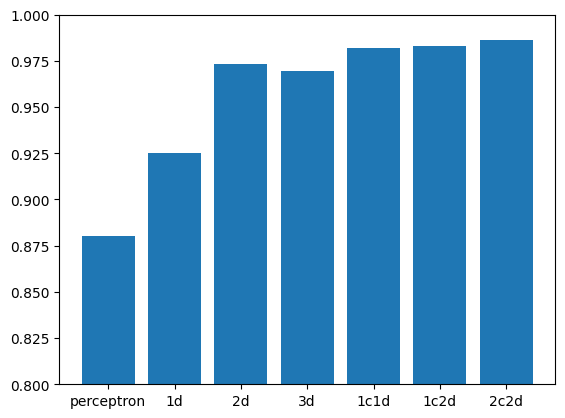

In [ ]:
# display as a bar chart
plt.bar(modelNames,scores)
plt.ylim(0.8, 1.0)
plt.show()